In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Acme Insurance Company sells auto insurance directly to consumers via Vertical Search websites. 
#On these websites, consumers who are already shopping for auto insurance enter some information about themselves and 
#then are shown ads from insurance companies. Each ad shown is called an "impression" and each record in this table 
#represents one ad impression.

# These ads are shown based on an online auction where insurance companies bid to have their ad shown, 
# and the ads are shown in order based on the highest bid amount. The insurance companies only pay if 
# their ad is clicked on, but bidding higher will cause the ad to be shown higher in the ranking and is 
# more likely to be clicked on if it is in a higher position.

# Acme currently bids $10 for all customers, but is able to set different bid prices for different types of customers.
# For example, Acme could bid $10 for all customers with 1 vehicle and $12 for all customers with 2 vehicles. 

# Acme would like to come up with a bidding strategy which optimizes the cost per customer acquired while ensuring
# that for every 10,000 ads shown they are expected to acquire at least 400 customers. How should Acme set prices by 
# customers segment?
# The channel manager who buys advertising on this vertical search website would also like to know if in
# the course of your analysis you come across any other interesting findings!


In [4]:
Acme=pd.read_csv("Acme.csv")
Acme.policies_sold[Acme['policies_sold']== " -   "]=0
Acme.policies_sold[Acme['policies_sold']== " 1 "]=1
Acme.marital_status[Acme['marital_status']== "S"]=0
Acme.marital_status[Acme['marital_status']== "M"]=1
Acme.currently_insured[Acme['currently_insured']== "N"]=0
Acme.currently_insured[Acme['currently_insured']== "Y"]=1
Acme['clicked']=0
Acme.clicked[Acme[' clicked_ad ']== " 1 "]=1
Acme=Acme.drop(columns=[' clicked_ad ']);
# Acme['policy_sold']=0
# Acme.policy_sold[Acme['policies_sold']== " 1 "]=1
# Acme=Acme.drop(columns=['policies_sold']);


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site

In [5]:
Acme.head()

,impression_id,cost,currently_insured,number_of_vehicles,number_of_drivers,marital_status,ranked_as,policies_sold,clicked
0,1,10,0,1,1,1,1,1,1
1,2,10,0,2,1,1,4,0,0
2,3,10,0,1,1,0,2,0,0
3,4,10,1,2,1,1,5,0,0
4,5,10,1,2,2,0,4,0,0


In [6]:
len(Acme[Acme.policies_sold==1])
# len(Acme[(Acme.number_of_drivers==1)&(Acme.clicked==1)])
# len(Acme[(Acme.number_of_drivers==1)&(Acme.policies_sold==1)])
Acme.number_of_vehicles.value_counts()

2    6083
1    3917
Name: number_of_vehicles, dtype: int64

In [7]:
Perc_buy_rank=np.zeros([4,5,6])
for j in range(4):
    print(j)
    if j==1 or j==2:
        inc=1
    else:
        inc=0
    for i in range(5):
        a=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==0+inc)])
        b=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==0+inc)&(Acme.clicked==1)])
        c=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==0+inc)&(Acme.policies_sold==1)])
        if b==0 & a==0:
            Perc_buy_rank[j,i,0:3]=[0,0,0]
        else:
            if b==0:
                Perc_buy_rank[j,i,0:3]=[c/a,b/a,0]
            else:
                Perc_buy_rank[j,i,0:3]=[c/a,b/a,c/b]
        a=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==1+inc)])
        b=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==1+inc)&(Acme.clicked==1)])
        c=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==1+inc)&(Acme.policies_sold==1)])
        if b==0 & a==0:
            Perc_buy_rank[j,i,3:6]=[0,0,0]
        else:
            if b==0:
                Perc_buy_rank[j,i,3:6]=[c/a,b/a,0]
            else:
                Perc_buy_rank[j,i,3:6]=[c/a,b/a,c/b]

0
1
2
3


# 

In [8]:
x=np.array([0,1])
lst=np.array(np.meshgrid(x, x, x, x)).reshape(-1,4)

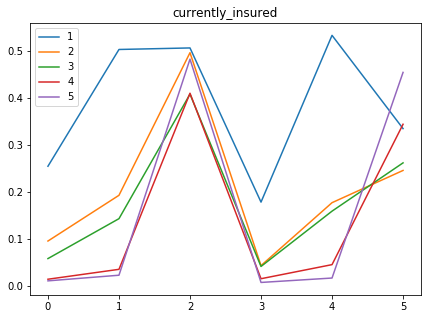

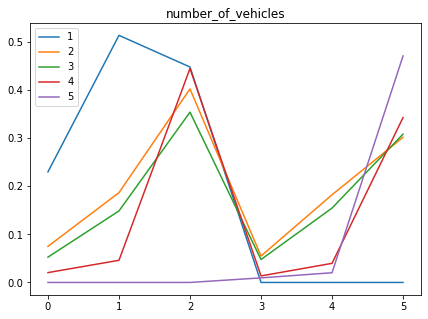

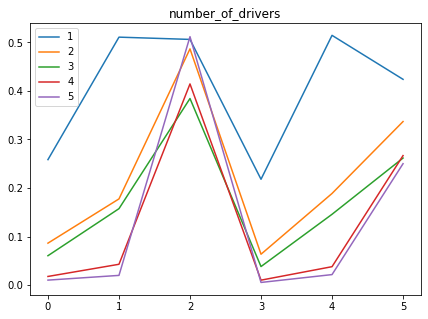

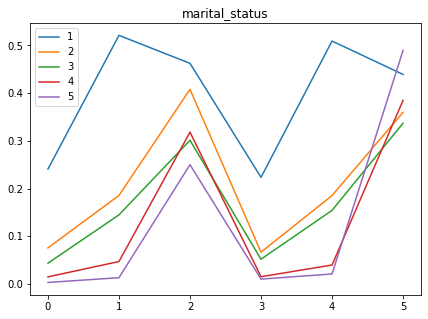

In [9]:
for j in range(4):
    plt.figure(figsize=(7,5))
    for i in range(5):
        num=str(i+1)
        plt.plot(range(6),Perc_buy_rank[j,i,:],
            label = num)
    plt.legend(fontsize=10)
    plt.title(Acme.columns[j+2])
    plt.show()

In [10]:
x=np.array([0,1])
lst=np.array(np.meshgrid(x, x, x, x)).reshape(-1,4)

In [11]:
x=np.array([0,1])
lst=np.array(np.meshgrid(x, x, x, x)).T.reshape(-1,4)
lst[:,1:3]=lst[:,1:3]+1
lst

array([[0, 1, 1, 0],
       [0, 2, 1, 0],
       [1, 1, 1, 0],
       [1, 2, 1, 0],
       [0, 1, 2, 0],
       [0, 2, 2, 0],
       [1, 1, 2, 0],
       [1, 2, 2, 0],
       [0, 1, 1, 1],
       [0, 2, 1, 1],
       [1, 1, 1, 1],
       [1, 2, 1, 1],
       [0, 1, 2, 1],
       [0, 2, 2, 1],
       [1, 1, 2, 1],
       [1, 2, 2, 1]])

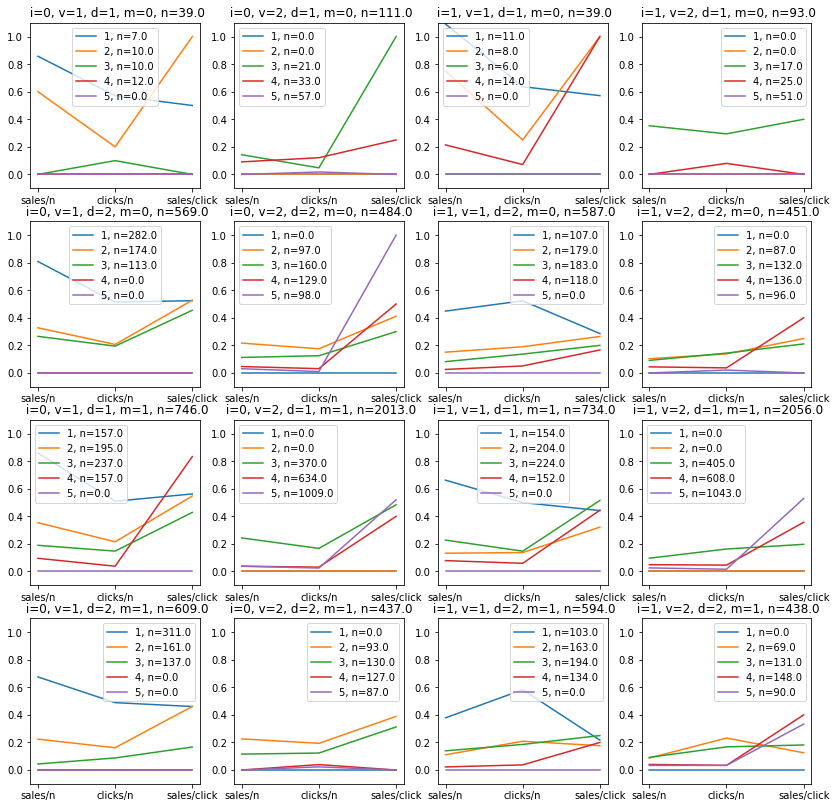

In [12]:
Perc_by_rank=np.zeros([16,5,5])

for j in range(16):
    for i in range(5):
        df=Acme[(Acme.iloc[:,2]==lst[j,0])&(Acme.iloc[:,3]==lst[j,1])&(Acme.iloc[:,4]==lst[j,2])&(Acme.iloc[:,5]==lst[j,3])]
        Perc_by_rank[j,i,4]=len(df)
        a=len(df[df.iloc[:,6]==i+1])
        Perc_by_rank[j,i,3]=a
        b=len(df[(df.iloc[:,6]==i+1)&(df.clicked==1)])
        c=len(df[(df.iloc[:,6]==i+1)&(df.policies_sold==1)])
        if b==0 & a==0:
            Perc_by_rank[j,i,0:3]=[0,0,0]
        else:
            if b==0:
                Perc_by_rank[j,i,0:3]=[c/a,b/a,0]
            else:
                Perc_by_rank[j,i,0:3]=[c/a,b/a,c/b]
plt.figure(figsize=(14,14))
for j in range(16):
    plt.subplot(4,4,j+1)
    for i in range(5):
        num=str(i+1) + ", n=" + str(Perc_by_rank[j,i,3])
#         plt.plot(range(3),Perc_by_rank[j,i,0:3], label = num)
        pts=np.array([Perc_by_rank[j,i,0]*3, Perc_by_rank[j,i,1], Perc_by_rank[j,i,2]])
        plt.plot(range(3), pts, label = num)
    plt.legend(fontsize=10)
    plt.xticks(np.arange(3), ('sales/n', 'clicks/n', 'sales/click'))
    plt.ylim(-.1,1.1)
    plt.title(" i=" + str(lst[j,0]) + ", v=" + str(lst[j,1]) + ", d="+ str(lst[j,2]) +
              ", m="+ str(lst[j,3]) + ", n="+ str(Perc_by_rank[j,0,4]))
plt.show()

In [13]:
sums=np.zeros(4)
for j in range(15):
    if Perc_by_rank[j,0,3]==0:
        if Perc_by_rank[j,1,3]>0:
            for i in range(4):
                sums[i]=sums[i]+Perc_by_rank[j,i+1,3]
    elif Perc_by_rank[j,3,3]>0:
        for i in range(4):
            sums[i]=sums[i]+Perc_by_rank[j,i,3]       
    
print(sums, sums[0]+sums[3],sums[1]+sums[2],sums[0]/sums[1],sums[3]/sums[2],(sums[0]+sums[3])/(sums[1]+sums[2]))

[ 816. 1181. 1246.  868.] 1684.0 2427.0 0.6909398814563928 0.6966292134831461 0.6938607334157396


In [14]:
means=np.zeros(16)
for j in range(16):
    s=0
    for i in range(5):
        s=s+Perc_by_rank[j,i,3]*(i+1)
    means[j]=s/sum(Perc_by_rank[j,:,3])
print(means)

[2.69230769 4.32432432 2.58974359 4.3655914  1.7029877  3.47107438
 2.53151618 3.53436807 2.52815013 4.31743666 2.50953678 4.31031128
 1.71428571 3.47597254 2.6043771  3.5913242 ]


In [15]:
from scipy.integrate import quad
pdf = lambda x,mu : ((1.82**4 - (x-mu)**4)**.25)/6.141436961093065
def prob (a,b,mu):
    if (b < mu-1.82) or (a>mu+1.82):
        ans=0
    else:
        ans=quad(pdf,np.max([a,mu-1.82]),np.min([b,mu+1.82]), args=(mu,))[0]
    return ans

In [51]:
# err_mat=np.zeros(100)
# for k in range(100):
#     r=r_mat[k]
#     pdf = lambda x,mu : ((r**4 - (x-mu)**4)**.25)/6.141436961093065
#     def prob (a,b,mu):
#         if (b < mu-r) or (a>mu+r):
#             ans=0
#         else:
#             ans=quad(pdf,np.max([a,mu-r]),np.min([b,mu+r]), args=(mu,))[0]
#         return ans

#     n_approx_prob_res=np.zeros([16,5])

#     for j in range(16):
#         for i in range(5):
#             if i==0:
#                 n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(-2,i+1.5,means[j])
#             elif i==4:
#                 n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(i+.5,7,means[j])
#             else:
#                 n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(i+.5,i+1.5,means[j])
#     err_mat[k]=np.linalg.norm(n_approx_prob_res)/20

In [54]:
# r=r_mat[np.argmin(err_mat)]
r=1.8441414141414143

pdf = lambda x,mu : ((r**4 - (x-mu)**4)**.25)/6.141436961093065
def prob (a,b,mu):
    if (b < mu-r) or (a>mu+r):
        ans=0
    else:
        ans=quad(pdf,np.max([a,mu-r]),np.min([b,mu+r]), args=(mu,))[0]
    return ans

n_approx_prob_res=np.zeros([16,5])

for j in range(16):
    for i in range(5):
        if i==0:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(-2,i+1.5,means[j])
        elif i==4:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(i+.5,7,means[j])
        else:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(i+.5,i+1.5,means[j])
np.linalg.norm(n_approx_prob_res)/20

0.01737243587121457

In [65]:
n_approx=np.zeros([16,5])
for j in range(16):
    for i in range(5):
        if i==0:
            n_approx[j,i]=Perc_by_rank[j,0,4]*prob(-2,i+1.5,means[j])
        elif i==4:
            n_approx[j,i]=Perc_by_rank[j,0,4]*prob(i+.5,7,means[j])
        else:
            n_approx[j,i]=Perc_by_rank[j,0,4]*prob(i+.5,i+1.5,means[j])

In [66]:
res=n_approx-Perc_by_rank[:,:,3]
np.linalg.norm(res)/20

13.746470668768936

In [67]:
np.argmax(res.reshape(-1,1))

47

In [68]:
res

array([[  -0.81542654,    1.58409817,    1.69330985,   -1.60081605,
           0.18032855],
       [   0.        ,    0.24006612,    8.32188602,    0.27558034,
          -5.87328039],
       [  -3.66120402,    3.63097659,    5.67882249,   -4.60710108,
           0.        ],
       [   0.        ,    0.        ,    6.6286311 ,    2.86662601,
          -7.01169454],
       [ -24.58434592,   -3.38109526,   39.53738721,    3.62318409,
           0.        ],
       [   0.        ,   10.88321658,  -15.21671407,   15.59498314,
           1.66372169],
       [  13.42807747,   -3.64531968,   -7.39640285,   13.28946471,
           0.        ],
       [   0.        ,    5.15017049,    2.71748455,   -1.07387488,
           5.25016304],
       [  -3.21673098,   27.87183796,  -13.84573614,    9.11253965,
           0.        ],
       [   0.        ,    6.31610481,  163.91573323,  -30.50146693,
         -85.97325877],
       [   1.31290513,   15.38587085,   -4.52013657,    7.4228114 ,
           0